In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns
import sys
pth = op.abspath("../")
print pth
sys.path.insert(0, pth)
import teigen
import itertools
reload(teigen)
print teigen.__path__
import teigen.tb_vtk
reload (teigen.tb_vtk)

/Users/mjirik/projects/teigen
Using QVariant and QString version 1
['/Users/mjirik/projects/teigen/teigen']


<module 'teigen.tb_vtk' from '/Users/mjirik/projects/teigen/teigen/tb_vtk.pyc'>

In [3]:
tg = teigen.tgmain.Teigen()
config = tg.get_default_config()

In [4]:
## Paper figures
def get_paper_config(resolution_mm=0.02, areasize_px=[50, 50, 50]):
    areasize_px = np.asarray(areasize_px)
    config = tg.get_default_config()
    config["generator_id"] = 3
    #config["output"]["note"] = run_label + " " + radius_method
    gc = config["generators"]["Unconnected tubes"]
    gc["element_number"] = 30
    gc["radius_distribution_uniform"] = True
    gc["radius_distribution_fixed"] = False
    gc["orientation_anisotropic"] = False
    gc["radius_distribution_mean"] = 0.2
    gc["radius_distribution_standard_deviation"] = 0.0
    gc["radius_distribution_maximum"] = 3.0
    gc["radius_distribution_minimum"] = .3
    gc["length_distribution_mean"] = 3.0
    gc["length_distribution_standard_deviation"] = .0
    gc["volume_fraction"] = 0.5
    gc["random_generator_seed"] = 100
    gc["orientation_anisotropic"] = False
    config["postprocessing"]["gaussian_blur"] = True
    config["postprocessing"]["gaussian_filter_sigma_mm"] = 0.04
    config["postprocessing"]["measurement_resolution"] = 35
    config["postprocessing"]['add_noise'] = False
    config["postprocessing"]['noise_exponent'] = 0.
    config["postprocessing"]['noise_std'] = 20
    config["postprocessing"]['noise_mean'] = 0.
    config["postprocessing"]['noise_lambda0'] = 0.02
    config["postprocessing"]['noise_lambda1'] = 1.0
    config["appearance"]["skip_volume_generation"] = False
    config["measurement"]["polygon_radius_selection_method"] = "inscribed"
    config['areasampling']["areasize_px"] = areasize_px
    config['areasampling']["areasize_mm"] = areasize_px * resolution_mm
    config['areasampling']["voxelsize_mm"] = [resolution_mm, resolution_mm, resolution_mm]
    # config['filepattern'] = "~/teigen_data/generated_resolution_mm_{seriesn:03d}/data{:06d}.jpg"
    return config

{'voxelsize_mm': [0.02, 0.02, 0.02], 'areasize_px': array([50, 50, 50]), 'areasize_mm': array([ 1.,  1.,  1.])}
{'sample_spacing': [0.02, 0.02, 0.02], 'exponent': 0.0, 'random_generator_seed': 0, 'lambda0': 0.02, 'shape': array([50, 50, 50]), 'lambda1': 1.0}
<type 'int'>
<type 'float'>
<type 'numpy.ndarray'>
0.0
noise_std  <type 'int'> 20
min max  -3.2049223402 2.83577166255
mean std  1.84348391485e-12 0.697563641367
min max  -91.8890306244 81.3050306635
mean std  5.28545933776e-11 20.0


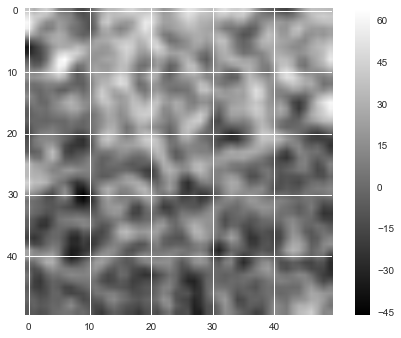

In [5]:
config = get_paper_config(resolution_mm=0.02, areasize_px=[50, 50, 50])
config["postprocessing"]['add_noise'] = True
config["postprocessing"]['noise_exponent'] = 0.
config["postprocessing"]['noise_std'] = 20
config["postprocessing"]['noise_mean'] = 0.
config["postprocessing"]['noise_lambda0'] = 0.02
config["postprocessing"]['noise_lambda1'] = 1.0
     
print config["areasampling"]

tg.update_config(**config)
noise = tg.generate_noise()
plt.imshow(noise[:,:,10], cmap="gray")
plt.colorbar()

{'voxelsize_mm': [0.04, 0.04, 0.04], 'areasize_px': array([25, 25, 25]), 'areasize_mm': array([ 1.,  1.,  1.])}
{'sample_spacing': [0.04, 0.04, 0.04], 'exponent': 0.0, 'random_generator_seed': 0, 'lambda0': 0.02, 'shape': array([25, 25, 25]), 'lambda1': 1.0}
<type 'int'>
<type 'float'>
<type 'numpy.ndarray'>
0.0
noise_std  <type 'int'> 20
min max  -1.94950751927 2.18182088111
mean std  -1.16226146929e-13 0.710915083356
min max  -54.8450177781 61.3806327137
mean std  -3.2689422369e-12 20.0


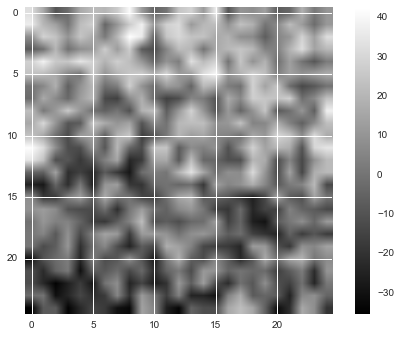

In [6]:
config = get_paper_config(resolution_mm=0.04, areasize_px=[25, 25, 25])
config["postprocessing"]['add_noise'] = True
config["postprocessing"]['noise_exponent'] = 0.
config["postprocessing"]['noise_std'] = 20
config["postprocessing"]['noise_mean'] = 0.
     
print config["areasampling"]

tg.update_config(**config)
noise = tg.generate_noise()
plt.imshow(noise[:,:,10], cmap="gray")
plt.colorbar()